# Axis info metadata EDA

## Notebooks set-up|

In [1]:
# Set notebook root to project root
from helper_functions import set_project_root

set_project_root()

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
import configuration as config

Working directory: /mnt/arkk/kaggle/ariel-data-challenge


## 1. Load and inspect

In [2]:
axis_info = pd.read_parquet(f'{config.DATA_DIRECTORY}/raw/axis_info.parquet')
axis_info.head()

,AIRS-CH0-axis0-h,AIRS-CH0-axis2-um,AIRS-CH0-integration_time,FGS1-axis0-h
0,0.000028,4.078463,0.1,0.000028
1,0.000056,4.074023,4.5,0.000056
2,0.001361,4.069568,0.1,0.000139
3,0.001389,4.065100,4.5,0.000167
4,0.002694,4.060618,0.1,0.000250


In [3]:
axis_info.describe()

,AIRS-CH0-axis0-h,AIRS-CH0-axis2-um,AIRS-CH0-integration_time,FGS1-axis0-h
count,11250.000000,356.000000,11250.000000,135000.000000
mean,3.749375,3.000661,2.300000,3.749986
std,2.165160,0.711864,2.200098,2.165072
min,0.000028,1.633253,0.100000,0.000028
25%,1.874701,2.407917,0.100000,1.875007
50%,3.749375,3.073674,2.300000,3.749986
75%,5.624049,3.630522,4.500000,5.624965
max,7.498722,4.078463,4.500000,7.499944


In [4]:
axis_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135000 entries, 0 to 134999
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AIRS-CH0-axis0-h           11250 non-null   float64
 1   AIRS-CH0-axis2-um          356 non-null     float64
 2   AIRS-CH0-integration_time  11250 non-null   float64
 3   FGS1-axis0-h               135000 non-null  float64
dtypes: float64(4)
memory usage: 4.1 MB


Ah - OK, this makes more sense now. When I saw 'axis', I was thinking of spatial alignment of the satellite, or maybe the star system? I don't know what I was picturing, but this is better. It's data for each axis of the signal matrices. Much more helpful. Here's my interpretation:

1. AIRS-CH0-axis0-h: Time index for AIRS readings - h is probably hours (0.000028 x 3600 sec per hour ~ 0.1 s)
2. AIRS-CH0-axis2-um: Wavelength across the frames in μm, the range of ~ 1.6 - μm is consistent with the high energy-ish end of the IR spectrum
3. AIRS-CH0-integration_time: Amount of time the detector had been accumulating for when read (presumably in μs?)
4. FGS1-axis0-h: Time index of FGS1 readings

So I think we should probably resample some FGS1 data to match the AIRS time course and see if we can still spot transits easily.

## 1. FGS1 time series downsampling

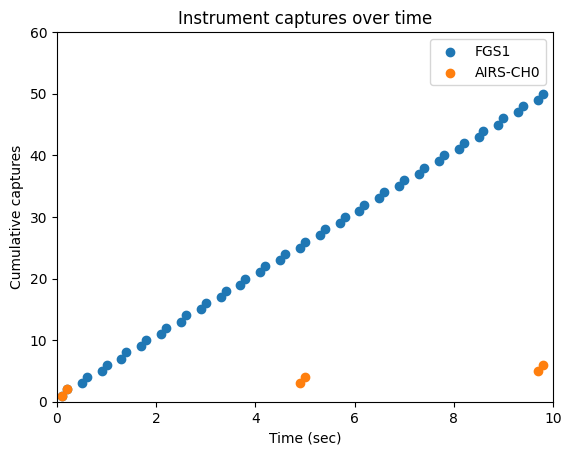

In [28]:
plt.title('Instrument captures over time')
plt.scatter(axis_info['FGS1-axis0-h'] * 3600, list(range(1, len(axis_info['FGS1-axis0-h']) + 1)), label='FGS1')
plt.scatter(axis_info['AIRS-CH0-axis0-h'] * 3600, list(range(1, len(axis_info['AIRS-CH0-axis0-h']) + 1)), label='AIRS-CH0')
plt.xlim(0, 10)
plt.ylim(0, 60)
plt.xlabel('Time (sec)')
plt.ylabel('Cumulative captures')
plt.legend(loc='best')
plt.show()